In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading Data from CSV file

In [216]:
!  pip install openpyxl==3.0.9

In [217]:
df = pd.read_excel('/content/drive/MyDrive/Fires_100.xlsx', sheet_name='2016')

In [218]:
df.head()

,YEAR,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,COMMENTS,REPORT_AC,GIS_ACRES,C_METHOD,OBJECTIVE
0,1878,California,Contract County,Los Angeles County,,0,<Null>,<Null>,14 - Unknown / Unidentified,NaN,<Null>,59468.8800,<Null>,Suppression (Wildfire)
1,1895,California,Contract County,Los Angeles County,,0,<Null>,<Null>,14 - Unknown / Unidentified,NaN,<Null>,628.1136,<Null>,Suppression (Wildfire)
2,1896,California,Contract County,Los Angeles County,,0,<Null>,<Null>,14 - Unknown / Unidentified,NaN,<Null>,7531.7170,<Null>,Suppression (Wildfire)
3,1898,California,Contract County,Los Angeles County,,0,<Null>,<Null>,14 - Unknown / Unidentified,NaN,<Null>,1660.1030,<Null>,Suppression (Wildfire)
4,1898,California,Contract County,Los Angeles County,,0,<Null>,<Null>,14 - Unknown / Unidentified,NaN,<Null>,428.4387,<Null>,Suppression (Wildfire)


From the above dataset, we can see that the Missing values are encoded as '<'NULL'>'. But we don't know if these values have been considered as NULL in Pandas Dataframe or not.

# Data Preprocessing 

## Data Cleaning

### Step 1: Encoding as NaN value

Checking the data type of each column in dataset. Here we can see that all the columns are appearing to be Not Null even though they have '<'NULL'>' values

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11795 entries, 0 to 11794
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   YEAR        11789 non-null  object 
 1   STATE       11795 non-null  object 
 2   AGENCY      11795 non-null  object 
 3   UNIT_ID     11794 non-null  object 
 4   FIRE_NAME   11769 non-null  object 
 5   INC_NUM     11720 non-null  object 
 6   ALARM_DATE  11795 non-null  object 
 7   CONT_DATE   11795 non-null  object 
 8   CAUSE       11795 non-null  object 
 9   COMMENTS    1961 non-null   object 
 10  REPORT_AC   11795 non-null  object 
 11  GIS_ACRES   11795 non-null  float64
 12  C_METHOD    11795 non-null  object 
 13  OBJECTIVE   11795 non-null  object 
dtypes: float64(1), object(13)
memory usage: 1.3+ MB


Printing number of '<'NULL'>' values in each column

In [220]:
print('No of <Null> values in each column: \n')
for col in df.columns:
    num = df[df[col] == '<Null>'].shape[0]
    print(f'{col} : {num}')


No of <Null> values in each column: 

YEAR : 56
STATE : 0
AGENCY : 0
UNIT_ID : 2
FIRE_NAME : 2
INC_NUM : 401
ALARM_DATE : 3985
CONT_DATE : 8821
CAUSE : 11
COMMENTS : 232
REPORT_AC : 8289
GIS_ACRES : 0
C_METHOD : 8443
OBJECTIVE : 56


##### Encoding <'Null'> as NaN so that they will be considered as missing values. Pandas Read Excel function has an option of encoding a certain value as NaN by using na_values parameter

In [221]:
df_wf = pd.read_excel('/content/drive/MyDrive/Fires_100.xlsx',na_values=['<Null>'], sheet_name='2016')

All '<'Null'>' values have been converted to NaN

In [222]:
df_wf.head()

,YEAR,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,COMMENTS,REPORT_AC,GIS_ACRES,C_METHOD,OBJECTIVE
0,1878.0,California,Contract County,Los Angeles County,,0,NaN,NaT,14 - Unknown / Unidentified,NaN,NaN,59468.8800,NaN,Suppression (Wildfire)
1,1895.0,California,Contract County,Los Angeles County,,0,NaN,NaT,14 - Unknown / Unidentified,NaN,NaN,628.1136,NaN,Suppression (Wildfire)
2,1896.0,California,Contract County,Los Angeles County,,0,NaN,NaT,14 - Unknown / Unidentified,NaN,NaN,7531.7170,NaN,Suppression (Wildfire)
3,1898.0,California,Contract County,Los Angeles County,,0,NaN,NaT,14 - Unknown / Unidentified,NaN,NaN,1660.1030,NaN,Suppression (Wildfire)
4,1898.0,California,Contract County,Los Angeles County,,0,NaN,NaT,14 - Unknown / Unidentified,NaN,NaN,428.4387,NaN,Suppression (Wildfire)


Counting number of NaN values

In [223]:
df_wf.isna().sum()

YEAR             62
STATE             0
AGENCY            0
UNIT_ID           3
FIRE_NAME        28
INC_NUM         476
ALARM_DATE     3985
CONT_DATE      8821
CAUSE            11
COMMENTS      10066
REPORT_AC      8289
GIS_ACRES         0
C_METHOD       8443
OBJECTIVE        56
dtype: int64

#### Printing number of data samples, number of features, number of classes

In [224]:
print(f'No. of data samples: {len(df_wf)}')
print(f'No. of Features: {len(df_wf.columns)}')
print(f'No. of classes: {len(df_wf["OBJECTIVE"].value_counts())}')

No. of data samples: 11795
No. of Features: 14
No. of classes: 2


#### Printing number of data samples per class

In [225]:
df_wf["OBJECTIVE"].value_counts()

Suppression (Wildfire)    11575
Resource Benefit (WFU)      164
Name: OBJECTIVE, dtype: int64

#### Checking the values in Fire Name column

In [226]:
df_wf['FIRE_NAME'].value_counts()

                     4081
UKNOWN                 72
COTTONWOOD             19
BEAR                   17
RIVER                  17
                     ... 
MORONGO #7              1
OUTSIDE ORIGIN #4       1
VAN VLEET               1
VANETTI                 1
TAYLOR RANCH            1
Name: FIRE_NAME, Length: 5586, dtype: int64

In [227]:
df_wf['FIRE_NAME'].value_counts()['UNKNOWN']

6

Most of the rows of Fire Name column are ' '  string. Around 72 rows have 'UKNOWN' value for this column, six rows have 'UNKNOWN' value.  And some of the rows have NaN. So first replace 'UKNOWN' by 'UNKNOWN'. Then replace  'UNKNOWN' with NaN

In [228]:
df_wf['FIRE_NAME'] = df_wf['FIRE_NAME'].replace('UKNOWN','UNKNOWN')
df_wf['FIRE_NAME'] = df_wf['FIRE_NAME'].replace(' ','UNKNOWN')
df_wf['FIRE_NAME'] = df_wf['FIRE_NAME'].replace('UNKNOWN', np.nan)

Corrected values in Fire_Name column

In [229]:
df_wf['FIRE_NAME'].value_counts()

COTTONWOOD           19
BEAR                 17
RIVER                17
LAKE                 16
CANYON               16
                     ..
MORONGO #7            1
OUTSIDE ORIGIN #4     1
VAN VLEET             1
VANETTI               1
TAYLOR RANCH          1
Name: FIRE_NAME, Length: 5583, dtype: int64

Checking Missing values 

In [230]:
df_wf.isna().sum()

YEAR             62
STATE             0
AGENCY            0
UNIT_ID           3
FIRE_NAME      4187
INC_NUM         476
ALARM_DATE     3985
CONT_DATE      8821
CAUSE            11
COMMENTS      10066
REPORT_AC      8289
GIS_ACRES         0
C_METHOD       8443
OBJECTIVE        56
dtype: int64

In [231]:
df_wf['INC_NUM'] = df_wf['INC_NUM'].replace(0, np.nan)

#### Checking the values in CAUSE column

In [232]:
df_wf['CAUSE'].value_counts()

14 - Unknown / Unidentified      6327
9 - Miscellaneous                1975
1 - Lightning                    1485
2 - Equipment Use                 519
7 - Arson                         466
5 - Debris                        226
4 - Campfire                      182
10 - Vehicle                      148
3 - Smoking                       145
11 - Powerline                    129
8 - Playing with fire              78
18 - Escaped Prescribed Burn       40
6 - Railroad                       33
15 - Structure                      9
16 - Aircraft                       7
13 - Non-Firefighter Training       7
12 - Firefighter Training           4
19 - Illegal Alien Campfire         4
Name: CAUSE, dtype: int64

Around 6000 values in CAUSE column have value "14 - Unknown / Unidentified". So, to have consistency replace this value by NaN 

In [233]:
df_wf['CAUSE'] = df_wf['CAUSE'].replace('14 - Unknown / Unidentified', np.nan)

#### Checking the values in C_METHOD column

In [234]:
df_wf['C_METHOD'].value_counts()

8 - Unknown                     1496
1 - GPS Ground                   622
2 - GPS Air                      356
7 - Mixed Collection Methods     351
6 - Hand Drawn                   334
3 - Infrared                      91
4 - Other Imagery                 81
5 - Photo Interpretation          21
Name: C_METHOD, dtype: int64

Around 1400 values in C_METHOD column have value "8 - Unknown". So, to have consistency replace this value by NaN 

In [235]:
df_wf['C_METHOD'] = df_wf['C_METHOD'].replace('8 - Unknown', np.nan)

In [236]:
df_wf['C_METHOD'].value_counts()

1 - GPS Ground                  622
2 - GPS Air                     356
7 - Mixed Collection Methods    351
6 - Hand Drawn                  334
3 - Infrared                     91
4 - Other Imagery                81
5 - Photo Interpretation         21
Name: C_METHOD, dtype: int64

#### No. of NaN values after correction

In [237]:
df_wf.isna().sum()

YEAR             62
STATE             0
AGENCY            0
UNIT_ID           3
FIRE_NAME      4187
INC_NUM        8410
ALARM_DATE     3985
CONT_DATE      8821
CAUSE          6338
COMMENTS      10066
REPORT_AC      8289
GIS_ACRES         0
C_METHOD       9939
OBJECTIVE        56
dtype: int64

#### Changing the datatype of Alarm_date column to DateTime

In [238]:
df_wf['ALARM_DATE']= pd.to_datetime(df_wf['ALARM_DATE'])

### Step 2: Handling Missing Values

Printing percentage of missing values per column

In [239]:
length = len(df_wf)
for col in df_wf.columns:
    print(f'{col}: {((df_wf[col].isna().sum()/length)*100).round(2)} %')

YEAR: 0.53 %
STATE: 0.0 %
AGENCY: 0.0 %
UNIT_ID: 0.03 %
FIRE_NAME: 35.5 %
INC_NUM: 71.3 %
ALARM_DATE: 33.79 %
CONT_DATE: 74.79 %
CAUSE: 53.73 %
COMMENTS: 85.34 %
REPORT_AC: 70.28 %
GIS_ACRES: 0.0 %
C_METHOD: 84.26 %
OBJECTIVE: 0.47 %


We can see that columns COMMENTS, C_METHOD have maximum NaN values (> 60%). So we will drop these columns. We will also drop FIRE_NAME and INC_NUM column, REPORT_AC since they are not significant

In [240]:
df_wf.drop(['COMMENTS', 'C_METHOD', 'FIRE_NAME','INC_NUM', 'REPORT_AC'], axis=1, inplace=True)

Percentange of missing values per column

In [241]:
length = len(df_wf)
for col in df_wf.columns:
    print(f'{col}: {((df_wf[col].isna().sum()/length)*100).round(2)} %')

YEAR: 0.53 %
STATE: 0.0 %
AGENCY: 0.0 %
UNIT_ID: 0.03 %
ALARM_DATE: 33.79 %
CONT_DATE: 74.79 %
CAUSE: 53.73 %
GIS_ACRES: 0.0 %
OBJECTIVE: 0.47 %


#### Filling Missing Values of Categorical column

#### Filling the missing values of 'OBJECTIVE' column by Mode 

In [243]:
df_wf['OBJECTIVE'].value_counts()

Suppression (Wildfire)    11575
Resource Benefit (WFU)      164
Name: OBJECTIVE, dtype: int64

In [244]:
df_wf['OBJECTIVE'].mode()

0    Suppression (Wildfire)
dtype: object

In [245]:
df_wf['OBJECTIVE'].fillna(df_wf['OBJECTIVE'].mode()[0], inplace = True)

Now the missing values of OBJECTIVE column have been handled 

In [246]:
df_wf.isna().sum()

YEAR            62
STATE            0
AGENCY           0
UNIT_ID          3
ALARM_DATE    3985
CONT_DATE     8821
CAUSE         6338
GIS_ACRES        0
OBJECTIVE        0
dtype: int64

#### Filling the missing values of 'CAUSE' column by Mode 

In [247]:
df_wf['CAUSE'].value_counts()

9 - Miscellaneous                1975
1 - Lightning                    1485
2 - Equipment Use                 519
7 - Arson                         466
5 - Debris                        226
4 - Campfire                      182
10 - Vehicle                      148
3 - Smoking                       145
11 - Powerline                    129
8 - Playing with fire              78
18 - Escaped Prescribed Burn       40
6 - Railroad                       33
15 - Structure                      9
16 - Aircraft                       7
13 - Non-Firefighter Training       7
12 - Firefighter Training           4
19 - Illegal Alien Campfire         4
Name: CAUSE, dtype: int64

In [248]:
df_wf['CAUSE'].fillna(df_wf['CAUSE'].mode()[0], inplace = True)

Now the missing values of CAUSE column have been handled 

In [249]:
df_wf.isna().sum()

YEAR            62
STATE            0
AGENCY           0
UNIT_ID          3
ALARM_DATE    3985
CONT_DATE     8821
CAUSE            0
GIS_ACRES        0
OBJECTIVE        0
dtype: int64

#### Filling  Missing Values of Unit Id column

In [250]:
df_wf['UNIT_ID'].value_counts()

Los Angeles County                       874
Riverside CAL FIRE                       677
Cleveland National Forest                661
Los Padres National Forest               533
San Bernardino National Forest           477
                                        ... 
CRA                                        1
City of Weed Vol. Fire Dept.               1
Kern National Wildlife Refuge              1
Sacramento National Wildlife Refuge        1
Bitter Creek National Wildlife Refuge      1
Name: UNIT_ID, Length: 77, dtype: int64

Now, to fill missing values of UNIT_ID we cannot directly use Mode of the entire column to fill the missing values. This is because, this UNIT_ID is the location where the fire took place which is present in a particular State. Therefore, UNIT_ID column is dependent on the STATE column as well. 

In [251]:
df_wf['STATE'].value_counts()

California    11747
Nevada           41
Oregon            6
Arizona           1
Name: STATE, dtype: int64

Since, there are 4 States in the dataset, we need to filter the data by each State and we need to use to Mode value of Unit_ID for each State to fill the respective missing values.



Printing the Unit_ids present in California

In [252]:
df_wf[df_wf['STATE']=='California']['UNIT_ID'].value_counts()

Los Angeles County                     874
Riverside CAL FIRE                     677
Cleveland National Forest              661
Los Padres National Forest             533
San Bernardino National Forest         477
                                      ... 
Clear Lake National Wildlife Refuge      1
Lava Beds National Monument              1
Redwood National and State Parks         1
APV                                      1
Humbolt-Toiyabe National Forest          1
Name: UNIT_ID, Length: 76, dtype: int64

Printing the Unit_ids present in Nevada

In [253]:
df_wf[df_wf['STATE']=='Nevada']['UNIT_ID'].value_counts()

Toiyabe National Forest            33
Northern CA District - BLM          3
Humbolt-Toiyabe National Forest     2
Carson City District or - BLM       2
Lake Taho Basin Management Unit     1
Name: UNIT_ID, dtype: int64

Printing the Unit_ids present in Oregon

In [254]:
df_wf[df_wf['STATE']=='Oregon']['UNIT_ID'].value_counts()

Klamath National Forest    4
Name: UNIT_ID, dtype: int64

Printing the Unit_ids present in Arizona

In [255]:
df_wf[df_wf['STATE']=='Arizona']['UNIT_ID'].value_counts()

CRA    1
Name: UNIT_ID, dtype: int64

Filling the missing values of Unit_ID for those rows having STATE = California

In [256]:
cond1 = (df_wf['STATE'] == 'California')
df_wf.loc[cond1,'UNIT_ID'] = df_wf.loc[cond1,'UNIT_ID'].fillna(df_wf.loc[cond1,'UNIT_ID'].mode()[0])

Filling the missing values of Unit_ID for those rows having STATE = Nevada

In [257]:
cond2 = (df_wf['STATE'] == 'Nevada')
df_wf.loc[cond2,'UNIT_ID'] = df_wf.loc[cond2,'UNIT_ID'].fillna(df_wf.loc[cond2,'UNIT_ID'].mode()[0])

Filling the missing values of Unit_ID for those rows having STATE = Oregon

In [258]:
cond3 = (df_wf['STATE'] == 'Oregon')
df_wf.loc[cond3,'UNIT_ID'] = df_wf.loc[cond3,'UNIT_ID'].fillna(df_wf.loc[cond3,'UNIT_ID'].mode()[0])

Filling the missing values of Unit_ID for those rows having STATE = Arizona

In [259]:
cond4 = (df_wf['STATE'] == 'Arizona')
df_wf.loc[cond4,'UNIT_ID'] = df_wf.loc[cond4,'UNIT_ID'].fillna(df_wf.loc[cond4,'UNIT_ID'].mode()[0])

Now the missing values of UNIT_ID column have been handled 

In [260]:
df_wf.isna().sum()

YEAR            62
STATE            0
AGENCY           0
UNIT_ID          0
ALARM_DATE    3985
CONT_DATE     8821
CAUSE            0
GIS_ACRES        0
OBJECTIVE        0
dtype: int64

In [261]:
df_wf.shape

(11795, 9)

### Augmenting the dataset

adding a new column Duration which is the difference between the date when fire started and the date when it was contained

In [262]:
df_wf['DURATION'] = (df_wf['CONT_DATE'] - df_wf['ALARM_DATE']).dt.days

In [263]:
df_wf.isna().sum()

YEAR            62
STATE            0
AGENCY           0
UNIT_ID          0
ALARM_DATE    3985
CONT_DATE     8821
CAUSE            0
GIS_ACRES        0
OBJECTIVE        0
DURATION      8827
dtype: int64

### Removing Outliers

Plotting a Box and a Violin plot to check outlier of Duration column

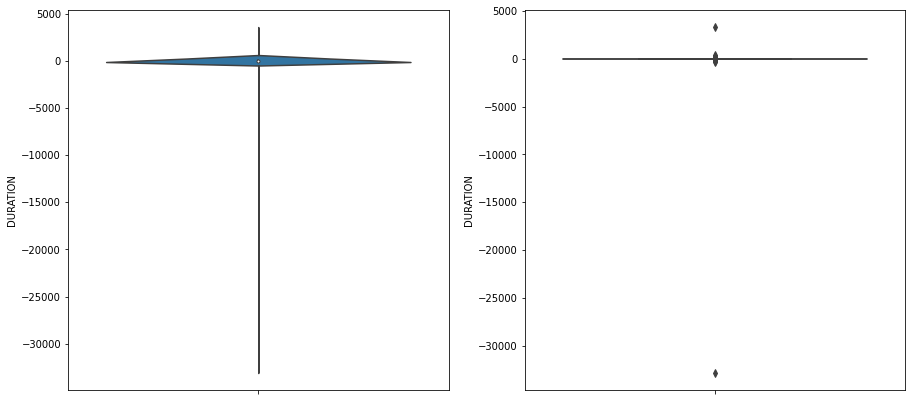

In [273]:
f, axes = plt.subplots(1, 2, figsize=(15,7))
_ = sns.violinplot( y ='DURATION', data=df_wf, ax=axes[0] )
_ = sns.boxplot( y ='DURATION', data=df_wf, ax=axes[1] )

In [274]:
df_wf['DURATION'].min()

-32862.0

In [275]:
df_wf['DURATION'].max()

3319.0

Here the min duration is coming as negative and max value is more than 3000 days which cannot be the case. This means there is some error in the data. Hence simply remove those rows

In [276]:
df_wf = df_wf[(df_wf['DURATION'] >= 0) & (df_wf['DURATION'] < 3000)]

In [277]:
df_wf.reset_index(inplace=True, drop=True)

In [278]:
df_wf.head()

,YEAR,STATE,AGENCY,UNIT_ID,ALARM_DATE,CONT_DATE,CAUSE,GIS_ACRES,OBJECTIVE,DURATION
0,1921.0,California,USDA Forest Service,Eldorado National Forest,1921-10-04,1921-10-04,9 - Miscellaneous,273.4315,Suppression (Wildfire),0.0
1,1921.0,California,National Park Service,Sequoia - Kings Canyon NP,1921-07-05,1921-07-17,4 - Campfire,1551.4670,Suppression (Wildfire),12.0
2,1922.0,California,National Park Service,Sequoia - Kings Canyon NP,1922-09-19,1922-09-23,1 - Lightning,535.8748,Suppression (Wildfire),4.0
3,1922.0,California,National Park Service,Sequoia - Kings Canyon NP,1922-08-13,1922-08-17,4 - Campfire,667.1011,Suppression (Wildfire),4.0
4,1922.0,California,National Park Service,Sequoia - Kings Canyon NP,1922-07-04,1922-07-06,4 - Campfire,449.5453,Suppression (Wildfire),2.0


We also drop ALARM_DATE and CONT_DATE column since we have formed a new column DURATION which is more significant.

In [279]:
df_wf.drop(['ALARM_DATE', 'CONT_DATE'], axis=1, inplace=True)

In [280]:
df_wf.head()

,YEAR,STATE,AGENCY,UNIT_ID,CAUSE,GIS_ACRES,OBJECTIVE,DURATION
0,1921.0,California,USDA Forest Service,Eldorado National Forest,9 - Miscellaneous,273.4315,Suppression (Wildfire),0.0
1,1921.0,California,National Park Service,Sequoia - Kings Canyon NP,4 - Campfire,1551.4670,Suppression (Wildfire),12.0
2,1922.0,California,National Park Service,Sequoia - Kings Canyon NP,1 - Lightning,535.8748,Suppression (Wildfire),4.0
3,1922.0,California,National Park Service,Sequoia - Kings Canyon NP,4 - Campfire,667.1011,Suppression (Wildfire),4.0
4,1922.0,California,National Park Service,Sequoia - Kings Canyon NP,4 - Campfire,449.5453,Suppression (Wildfire),2.0


#### Dataframe after data cleaning step

In [200]:
df_wf.head()

,YEAR,STATE,AGENCY,UNIT_ID,CAUSE,GIS_ACRES,OBJECTIVE,DURATION
0,1921.0,California,USDA Forest Service,Eldorado National Forest,9 - Miscellaneous,273.4315,Suppression (Wildfire),0.0
1,1921.0,California,National Park Service,Sequoia - Kings Canyon NP,4 - Campfire,1551.4670,Suppression (Wildfire),12.0
2,1922.0,California,National Park Service,Sequoia - Kings Canyon NP,1 - Lightning,535.8748,Suppression (Wildfire),4.0
3,1922.0,California,National Park Service,Sequoia - Kings Canyon NP,4 - Campfire,667.1011,Suppression (Wildfire),4.0
4,1922.0,California,National Park Service,Sequoia - Kings Canyon NP,4 - Campfire,449.5453,Suppression (Wildfire),2.0


### Data Visualization

#### Bar Plot to find no. of acres burned in the last 20 years

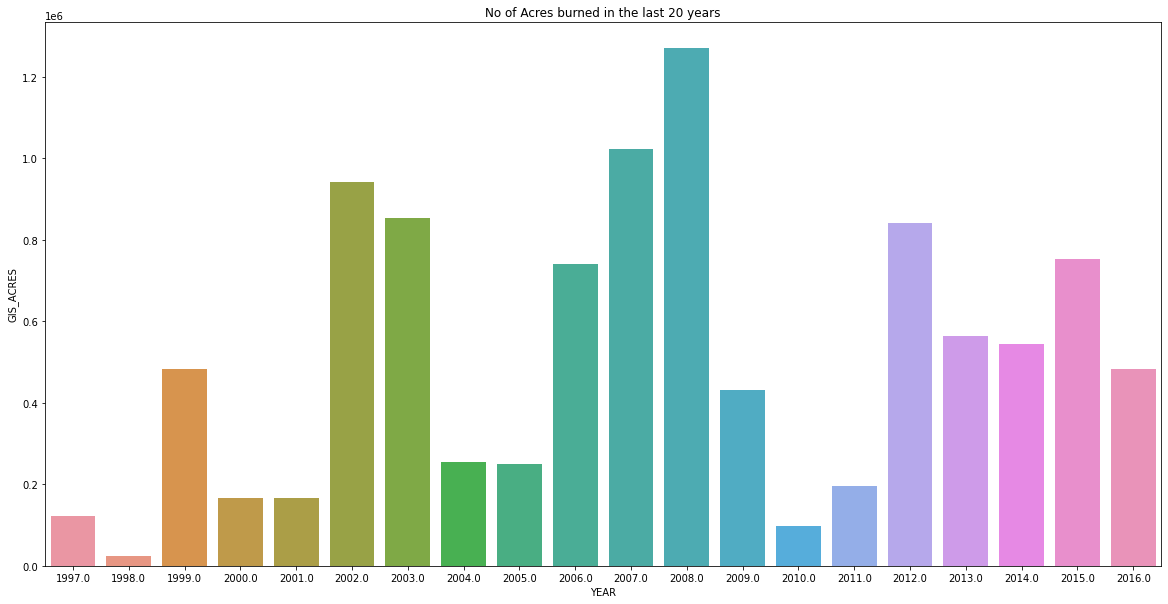

In [397]:
t = df_wf.groupby(by='YEAR').sum().iloc[-20:]
f =  plt.figure(figsize=(20,10))
plt.title('No of Acres burned in the last 20 years')
_ = sns.barplot(x=t.index, y = t['GIS_ACRES'])

As we can see from the above Bar Plot, year 2008 had maximum acers burned followed by 2007, 2002 and 2003. 1998 had lowest no. of acres burned followed by 2010 

#### Plotting a Histogram of GIS_ACRES and DURATION column 

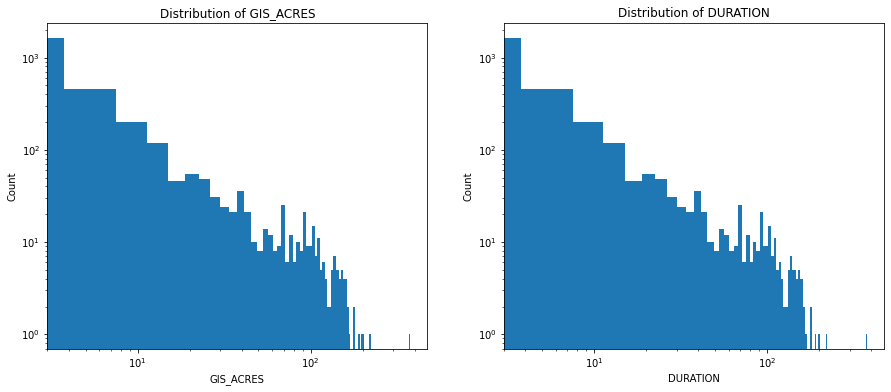

In [392]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plt.title('Distribution of GIS_ACRES')
_ = plt.hist(data = df_wf, x = 'DURATION', bins=100)
_ = plt.loglog()
_ = plt.xlabel('GIS_ACRES'); plt.ylabel('Count');

_ = plt.subplot(1,2,2)
plt.title('Distribution of DURATION')
_ = plt.hist(df_wf.DURATION, bins=100)
_ = plt.loglog()
_ = plt.xlabel('DURATION'); plt.ylabel('Count');

Histograms are useful to understand the distribution of variables. Here we have used log axis because both GIS_ACRES and DURATION have broad ranges. Here we can see that on log scale both the graphs have a roughly linear distibution

#### Plotting a Scatterplot of GIS_ACRES vs DURATION to check if they have any correlation or not

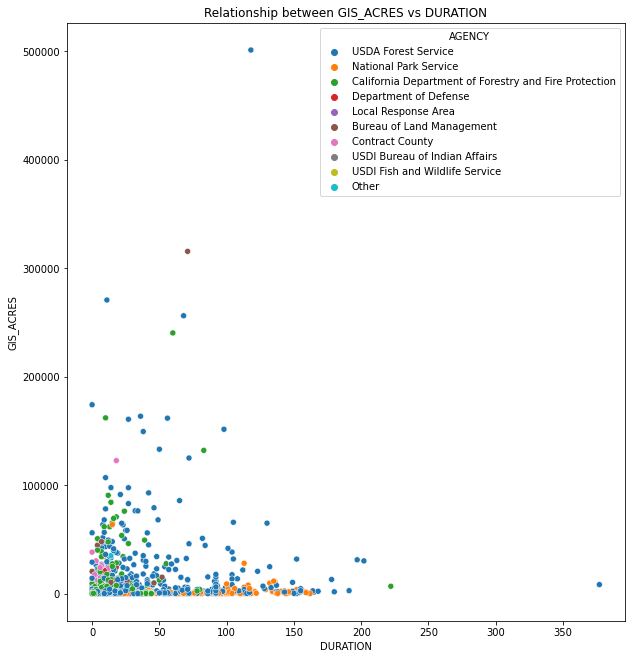

In [394]:
f =  plt.figure(figsize=(10,11))
plt.title('Relationship between GIS_ACRES vs DURATION')
g = sns.scatterplot(data=df_wf, y="GIS_ACRES", x = "DURATION", hue = 'AGENCY');

We can see that there is not much correlation between DURATION and GIS_ACRES. It is expected that bigger fires should last longer but that doesn't appear to happen always. One reason might be that each fire is taken care of by different agencies and hence the difference.

#### Count Plot for finding which forests have had Maximum Fires 

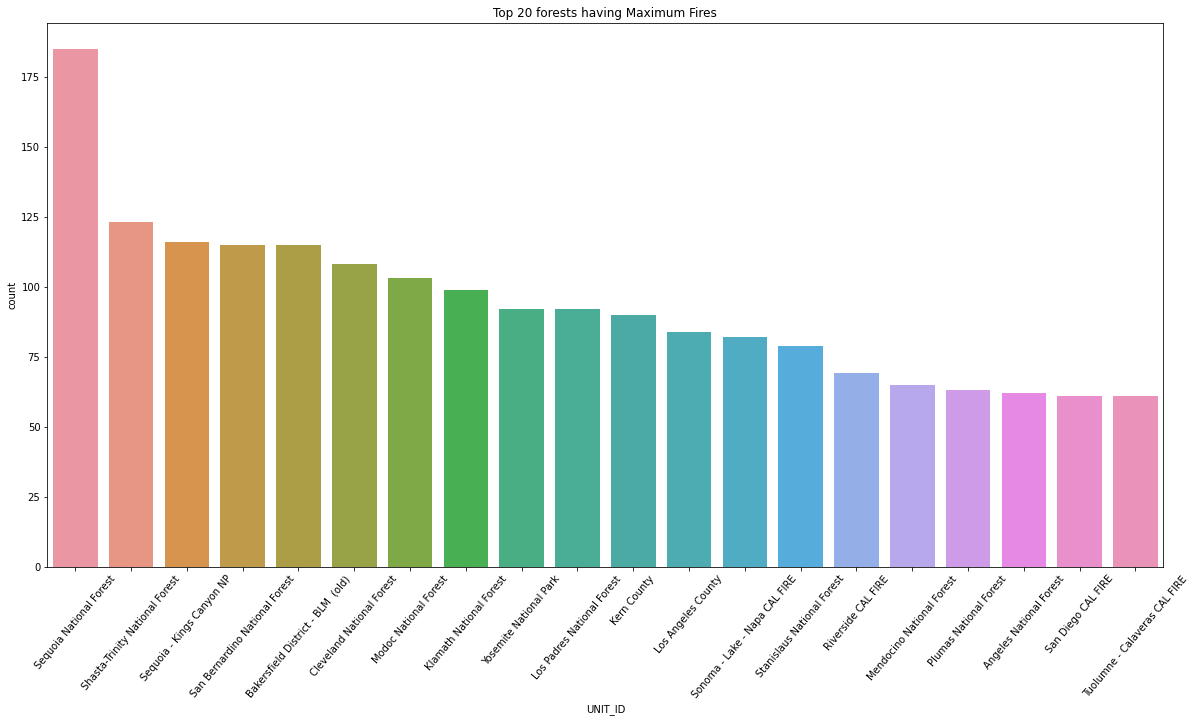

In [396]:
f =  plt.figure(figsize=(20,10))
plt.title('Top 20 forests having Maximum Fires')
_ = sns.countplot(x="UNIT_ID", data=df_wf, 
              order=df_wf['UNIT_ID'].value_counts().iloc[:20].index)
_  = plt.xticks(rotation=50)

As we can see from the above Count Plot, Sequonia National Forest had maximum fires (180) followed by Shasta-Trinity National Forest (125) 

#### Bar Plot to find Top 20 forests having Maximum Acres burned 

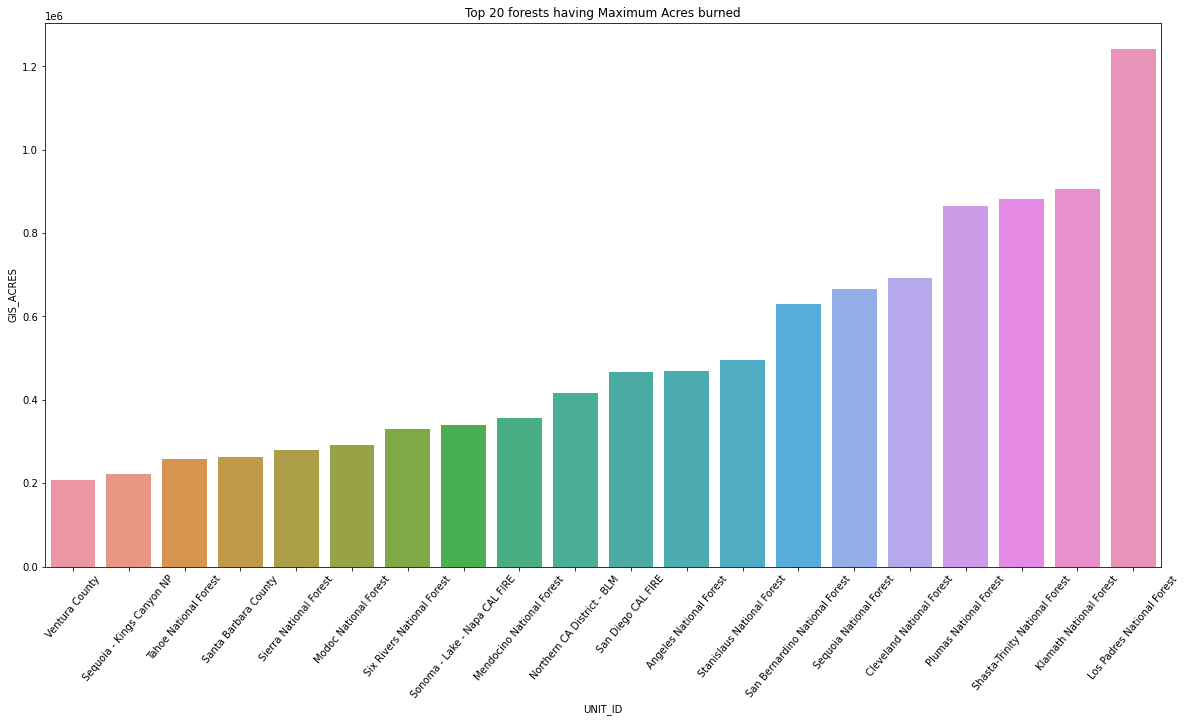

In [398]:
t = df_wf.groupby(by='UNIT_ID').sum().sort_values(by='GIS_ACRES').iloc[-20:]
f =  plt.figure(figsize=(20,10))
plt.title('Top 20 forests having Maximum Acres burned')
_ = sns.barplot(x=t.index, y = t['GIS_ACRES'])
_  = plt.xticks(rotation=50)

As seen from Bar Plot above, Los Padres National Forest had Maximum Acres burned followed by Klamath National Forest. One interesting thing to note here is that Sequoia National Forest had Maximum fires (as shown by the graph before this) but is not the highest in terms of No. of acres burned. 

#### Count Plot to find the most common cause of fire

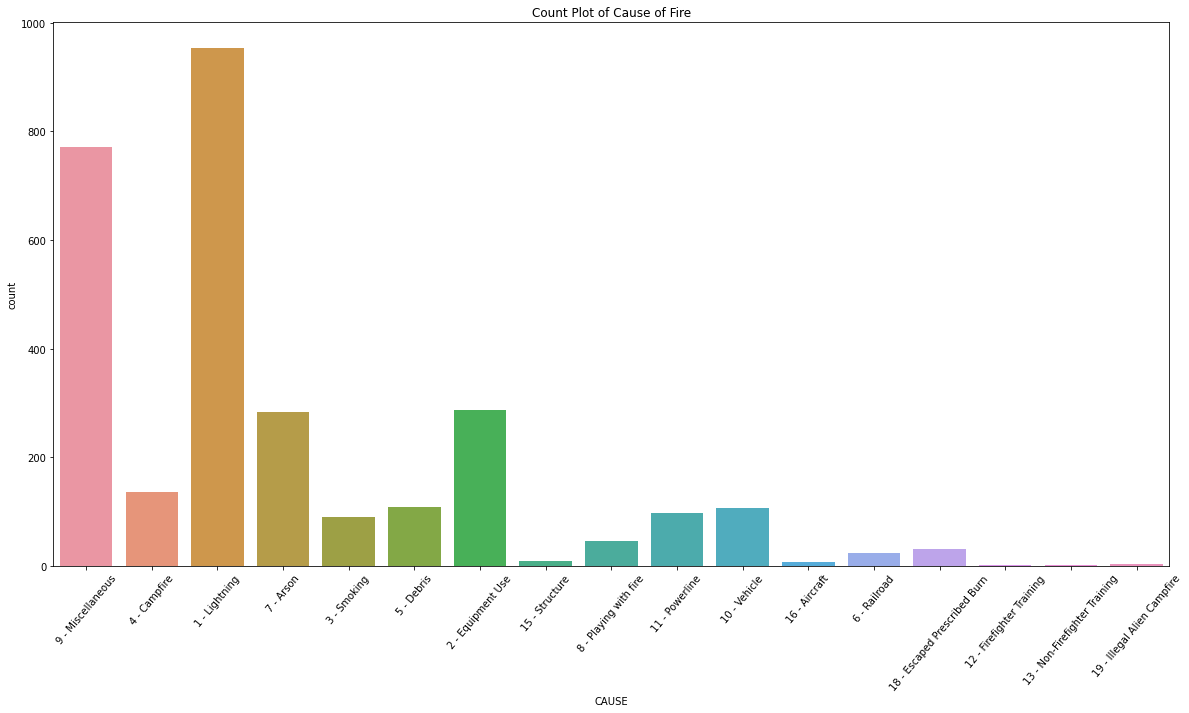

In [399]:
f =  plt.figure(figsize=(20,10))
plt.title('Count Plot of Cause of Fire')
_ = sns.countplot(x="CAUSE", data=df_wf)
_  = plt.xticks(rotation=50)

As seen from above count plot, the most Lightning is the most common cause of fire. 

#### Understanding "object" columns

Here we can see that The top objective is Suppression. Alos, most fires were caused by Lightning. Moreover, most of the fires were caused in California. 

In [201]:
df_wf.describe(include = 'object')

,STATE,AGENCY,UNIT_ID,CAUSE,OBJECTIVE
count,2959,2959,2959,2959,2959
unique,4,10,75,17,2
top,California,USDA Forest Service,Sequoia National Forest,1 - Lightning,Suppression (Wildfire)
freq,2950,1384,185,953,2827
